In [37]:
import numpy as np

def dfa_fast(vdata, istart, iend, L_all):
#function takes in your time series, the start and end time points, and the
#different L values you want to use in the implementation of DFA
    
    #number of columns of vdata
    lenY=len(vdata[1,:])
    #number of rows of vdata
    lenX=len(vdata)
    
    #takes the cumulative sum
    for y in range(lenY):
        for x in range(1,lenX):
            vdata[x][y]=vdata[x][y]+vdata[x-1][y]

    FL_all=np.zeros((len(L_all),lenY))
    
    #iterating through the L values you want to use
    for il in range(len(L_all)):
        L=L_all[il]
        y=[]
        for x in range(L):
            y.append(x)
        X=np.ones((L,2))
        for i in range(L):
            X[i][0]=y[i]
        
        #nice thing about this approach is if your data isn't an integer
        #multiple of the length L, it will just average as many windows as can fit
        c=0
        FL=np.zeros((1,len(vdata[1,:])))
        for i in range(istart,min(iend,lenX)-L+1,L):
            vtmp=np.zeros((L,lenY))
            for m in range(L):
                for n in range(lenY):
                    vtmp[m][n]=vdata[m+i][n]
                     
                
            #b=X\vtmp;
            #y=X*b;
            #r=vtmp-X*(X\vtmp);
            #calculates rms for that window
            
            #note: linalg.lstsq returns a list
            #d[0] is what we want
            d=np.linalg.lstsq(X, vtmp)
            
            m=np.matmul(X,d[0])
            s=np.subtract(vtmp,m)
            p=np.power(s,2)
            a=np.mean(p,axis=0)

            rms=np.sqrt(a)
            
            FL=np.add(FL,rms)
            c+=1
        
        FL=np.divide(FL,c)
        FL_all[il,:]=FL
    
    logFL=np.log(FL_all)
    X=np.reshape(L_all,(len(L_all),1))
    
    lx=np.log(X)
    logX=np.ones((len(X),2))
    for i in range(len(lx)):
            logX[i][0]=lx[i]
             
    b=np.linalg.lstsq(logX,logFL)
    res=b[0]
    return res[0,:]

In [38]:
def prep(file, row, col):
#inputs the data from a txt file to array
    data = file.readlines()
    allNums=np.zeros((row,col))
    x=0
    y=0
    for line in data:
        line.strip()
        for num in line.split(', '):
            float(num)
            allNums[x][y]=num
            y+=1
        x+=1
        y=0
    return allNums

In [73]:
import os

folder=os.listdir('/Users/alexlin/Desktop/Lab/MS/Run')
ideal = [10,16,20,30]
allData = np.zeros((95,86))
n=0
for file in folder:
    if file.endswith('.txt') and file != 'Names.txt':
        f=open(file,'r')
        #print(file)
        p=prep(f,180,86)
        d=dfa_fast(p,0,180,ideal)
        for i in range(len(d)):
            allData[n][i]=d[i]
        n+=1
        f.close
        continue
    else: 
        continue

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [74]:
import csv
n=open('Names.txt','r')
fn=n.readlines()
fields=[]
for line in fn:
    name=line[line.find('=')+1:len(line)-1]
    fields.append(name)

In [75]:
from pandas import DataFrame

# writing to csv file
with open('HurstExp.csv', 'w') as csvfile: 
    # creating a csv writer object 
    writer = csv.writer(csvfile) 
    # writing the fields 
    writer.writerow(fields) 
    # writing the data rows 
    writer.writerows(allData)

Text(0.5,1,'Hurst Exponents')

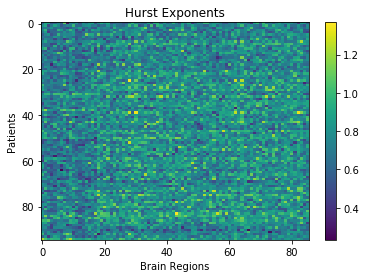

In [76]:
from matplotlib import pyplot as plt
plt.imshow(allData, aspect='auto')
plt.colorbar()
plt.xlabel('Brain Regions')
plt.ylabel('Patients')
plt.title('Hurst Exponents')

In [77]:
import pandas as pd

df = pd.read_csv('HurstExp.csv')
df.head()

,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,Left-VentralDC,Right-Cerebellum-Cortex,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
0,0.569354,0.883227,0.867079,0.552214,0.603649,0.739130,0.591474,1.091114,0.292150,0.718615,...,0.869473,0.708819,0.785498,0.774574,0.781035,0.669921,0.430167,0.847534,0.824957,0.577180
1,0.789804,0.909773,0.483691,0.687879,0.901617,0.756859,0.542639,0.667866,0.750343,0.717097,...,0.806843,0.775875,0.552417,0.908122,0.646678,0.650424,0.831885,0.648086,0.528042,0.791323
2,0.671616,0.691023,0.676984,0.809220,0.638954,0.689244,0.636945,0.589576,0.484558,0.580197,...,0.711323,0.790095,0.762228,0.913012,0.524543,0.617506,0.798878,0.747748,0.628103,0.772628
3,0.768071,0.970300,0.537393,0.624296,0.578482,0.972192,0.845196,0.616912,0.801774,0.996865,...,1.018209,0.723997,0.864105,0.633551,0.542313,0.710262,0.757496,0.923932,0.524281,0.566277
4,0.671889,0.857828,0.432527,0.599677,0.610247,0.636947,0.653461,0.804389,0.658859,0.761433,...,0.672317,0.918202,0.825053,0.787510,0.849581,0.634668,0.637046,0.851175,0.509787,0.451087


(array([ 1.,  1.,  7., 17., 18., 16., 13., 11.,  9.,  2.]),
 array([0.6320809 , 0.65830106, 0.68452123, 0.71074139, 0.73696155,
        0.76318171, 0.78940187, 0.81562203, 0.84184219, 0.86806235,
        0.89428251]),
 <a list of 10 Patch objects>)

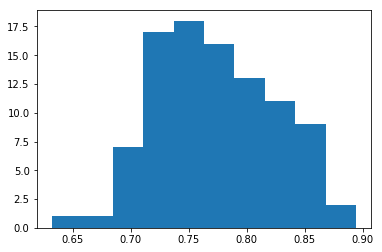

In [78]:
data2=np.zeros((95,1))
for i in range(95):
    s=0
    for n in range(86):
       s+=allData[i][n]
    mean=s/86
    data2[i][0]=mean

plt.hist(data2)

In [79]:
allData.min()

0.23238581848358944